# K-Nearest Neighbour | KNN classifier

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [67]:
df = pd.read_csv('D9data2.csv')

In [68]:
df.shape

(400, 4)

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


In [70]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [71]:
df.isnull().sum()

User ID            0
Age                0
EstimatedSalary    0
Purchased          0
dtype: int64

In [72]:
df.drop(columns='User ID',inplace=True)

In [73]:
df

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0
...,...,...,...
395,46,41000,1
396,51,23000,1
397,50,20000,1
398,36,33000,0


In [74]:
x = df.iloc[:,:-1].values

In [75]:
y = df.iloc[:,-1].values

In [76]:
from sklearn.model_selection import train_test_split

In [77]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [78]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

In [79]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [80]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=5,p=2)

In [82]:
classifier.fit(x_train,y_train)

KNeighborsClassifier()

In [85]:
y_pred = classifier.predict(x_test)

In [87]:
np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1)

array([[0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 0],
       [0, 0],
       [0, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 0],
       [1, 1],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0, 0],
       [1, 1],
       [0,

In [88]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [89]:
print(confusion_matrix(y_pred,y_test))
print(accuracy_score(y_pred,y_test))
print(classification_report(y_pred,y_test))

[[54  1]
 [ 4 21]]
0.9375
              precision    recall  f1-score   support

           0       0.93      0.98      0.96        55
           1       0.95      0.84      0.89        25

    accuracy                           0.94        80
   macro avg       0.94      0.91      0.92        80
weighted avg       0.94      0.94      0.94        80



C:\Users\Asus\AppData\Local\Temp\ipykernel_20216\73590382.py:10: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)


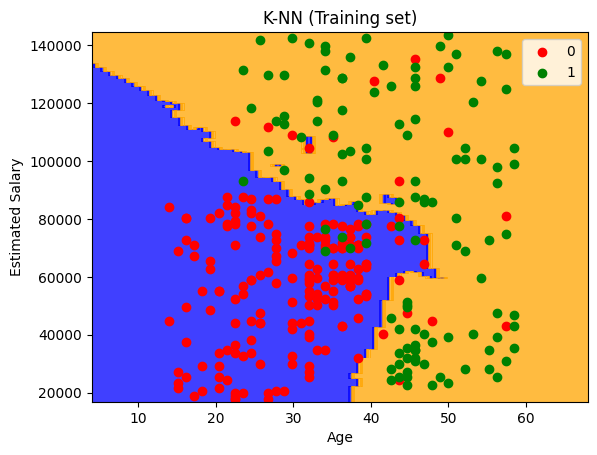

In [90]:
from matplotlib.colors import ListedColormap
X_set, y_set = sc.inverse_transform(x_train), y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 10, stop = X_set[:, 0].max() + 10, step = 1),
                     np.arange(start = X_set[:, 1].min() - 1000, stop = X_set[:, 1].max() + 1000, step = 1))
plt.contourf(X1, X2, classifier.predict(sc.transform(np.array([X1.ravel(), X2.ravel()]).T)).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'orange')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1], c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

---------------------------------

In [91]:
# Daatset:
# Assigning features and label variables
# First Feature
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
# Second Feature
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

# Label or target varible
play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [94]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [95]:
w_en = le.fit_transform(weather)
t_en = le.fit_transform(temp)
p_en = le.fit_transform(play)

In [104]:
x = zip(w_en,t_en,p_en)

In [105]:
df = pd.DataFrame(x)

In [106]:
df

,0,1,2
0,2,1,0
1,2,1,0
2,0,1,1
3,1,2,1
4,1,0,1
5,1,0,0
6,0,0,1
7,2,2,0
8,2,0,1
9,1,2,1


In [109]:
df.rename(columns={0:'weather',1:'temp',2:'play'},inplace=True)
df

,weather,temp,play
0,2,1,0
1,2,1,0
2,0,1,1
3,1,2,1
4,1,0,1
5,1,0,0
6,0,0,1
7,2,2,0
8,2,0,1
9,1,2,1


In [110]:
x = df.iloc[:,:-1].values

In [111]:
y = df.iloc[:,-1].values

In [112]:
# KNN Model
classifier_model = KNeighborsClassifier(n_neighbors=5)
classifier_model.fit(x,y)

KNeighborsClassifier()

In [113]:
# Prediction
classifier_model.predict([[0,2]]) 

array([1], dtype=int64)